In [1]:
backup_dir = 'drive/MyDrive/STAT 483/Data/Task 1/gas-sensor-array-temperature-modulation'
backup_file_1 = '20160930_203718.csv'
backup_path_1 = backup_dir + '/' + backup_file_1

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import to_categorical
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPool1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
def import_data(data_source, col_names=None):
    return pd.read_csv(data_source, names=col_names)

In [8]:
#read the file of first measurement (performed at 2016-09-30) as a data frame:
df20160930 = import_data(backup_path_1)
col_names = df20160930.columns.values

In [ ]:
#show the head of the data frame:
df20160930.head(20)

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0.000,0.0,49.7534,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
1,0.309,0.0,55.8400,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,9.4472,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167
2,0.618,0.0,55.8400,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,33.0704,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436
3,0.926,0.0,55.8400,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,58.3847,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363
4,1.234,0.0,55.8400,26.6200,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,71.7732,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445
5,1.544,0.0,55.8400,26.6200,240.8361,0.2020,60.1083,74.3444,81.5100,29.7970,72.9643,83.1477,80.5302,58.0412,39.2482,65.0981,67.8697,63.5316,50.3730,63.3641
6,1.854,0.0,55.8400,26.6200,240.7602,0.2010,64.1020,74.3444,76.4748,28.1797,72.4181,78.4368,79.0768,59.7614,40.4067,64.1416,61.6173,60.5007,50.6424,66.2847
7,2.163,0.0,55.8400,26.6200,240.6845,0.2009,62.6869,71.3877,73.8965,27.6523,64.4007,69.7912,72.5239,55.6363,39.6271,62.7987,65.8307,56.5195,50.3730,64.3090
8,2.472,0.0,55.8400,26.6200,240.6624,0.2009,54.8336,67.0368,69.2228,27.4429,64.9211,63.9055,63.5872,54.0730,40.5881,64.1416,63.9090,53.0811,48.9146,63.3641
9,2.781,0.0,55.8400,26.6200,240.6519,0.2003,51.2600,64.5303,61.4312,25.6881,54.7235,57.2118,59.6255,55.6363,40.9928,61.9071,60.3791,52.7888,48.3640,62.4461


In [ ]:
#make a correlated data frame:
#finding pairwise correlation of all columns in the dataframe.
#Any na values are automatically excluded. For any non-numeric data type columns
#in the dataframe it is ignored.
df20160930_corr=df20160930.corr()


<Axes: >

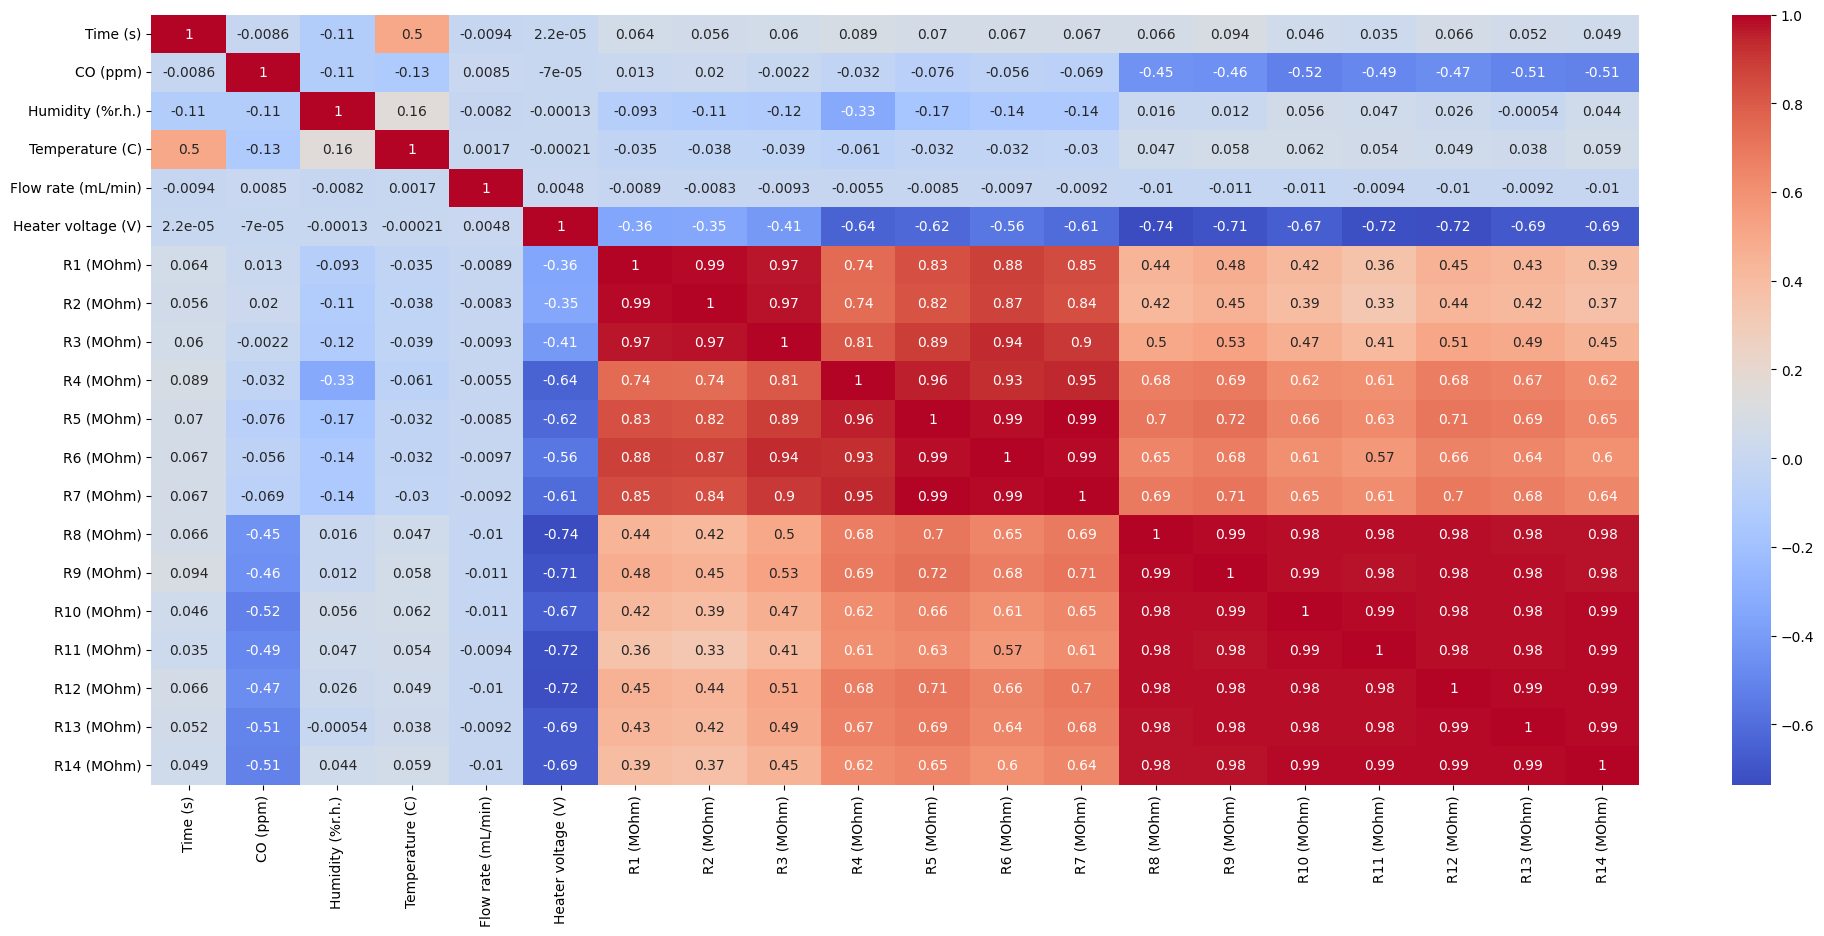

In [ ]:
#define the size of the plot:
plt.figure(figsize=(24,10))
#plot heatmap plot of the correlated data frame:
sns.heatmap(df20160930_corr,cmap='coolwarm',annot=True)

In [ ]:
#show the details of the data frame
#(number and list of the columns names,data type of each column,...)
df20160930.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295719 entries, 0 to 295718
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Time (s)            295719 non-null  float64
 1   CO (ppm)            295719 non-null  float64
 2   Humidity (%r.h.)    295719 non-null  float64
 3   Temperature (C)     295719 non-null  float64
 4   Flow rate (mL/min)  295719 non-null  float64
 5   Heater voltage (V)  295719 non-null  float64
 6   R1 (MOhm)           295719 non-null  float64
 7   R2 (MOhm)           295719 non-null  float64
 8   R3 (MOhm)           295719 non-null  float64
 9   R4 (MOhm)           295719 non-null  float64
 10  R5 (MOhm)           295719 non-null  float64
 11  R6 (MOhm)           295719 non-null  float64
 12  R7 (MOhm)           295719 non-null  float64
 13  R8 (MOhm)           295719 non-null  float64
 14  R9 (MOhm)           295719 non-null  float64
 15  R10 (MOhm)          295719 non-nul

In [ ]:
#show the shortened form of the full data frame (the first and last few rows are displayed)
df20160930

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0.000,0.0,49.7534,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
1,0.309,0.0,55.8400,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,9.4472,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167
2,0.618,0.0,55.8400,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,33.0704,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436
3,0.926,0.0,55.8400,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,58.3847,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363
4,1.234,0.0,55.8400,26.6200,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,71.7732,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295714,90908.545,0.0,62.3000,26.5800,0.0000,0.2000,5.5429,2.5713,10.3815,18.5796,36.4589,34.4549,38.3745,57.5888,45.7953,56.6351,56.4058,50.6129,43.0232,65.2822
295715,90908.853,0.0,62.3000,26.5800,0.0000,0.2000,4.5527,2.1454,8.5494,18.0592,36.6290,34.0052,37.6964,51.9752,45.0239,58.9374,61.6173,50.9361,43.4604,63.8761
295716,90909.162,0.0,62.3000,26.5800,0.0000,0.2000,3.7374,1.8492,7.1062,18.0087,36.0127,32.5056,37.1882,54.4724,45.0239,59.7462,57.1452,51.8182,42.5944,64.3090
295717,90909.469,0.0,62.3000,26.5800,0.0000,0.2000,3.1197,1.6190,5.9138,17.6950,37.5930,30.5253,35.9328,51.9752,45.5201,57.7289,60.3791,50.3466,42.4022,62.0375


In [ ]:
#show the list of total null values in each column:
df20160930.isnull().sum()

Time (s)              0
CO (ppm)              0
Humidity (%r.h.)      0
Temperature (C)       0
Flow rate (mL/min)    0
Heater voltage (V)    0
R1 (MOhm)             0
R2 (MOhm)             0
R3 (MOhm)             0
R4 (MOhm)             0
R5 (MOhm)             0
R6 (MOhm)             0
R7 (MOhm)             0
R8 (MOhm)             0
R9 (MOhm)             0
R10 (MOhm)            0
R11 (MOhm)            0
R12 (MOhm)            0
R13 (MOhm)            0
R14 (MOhm)            0
dtype: int64

In [5]:
#import libraries from scikit-learn to split data into train and test sets:
from sklearn.model_selection import train_test_split

In [9]:
#define object and featues in the data frame:
X = df20160930.drop('CO (ppm)',axis=1).drop('Humidity (%r.h.)', axis = 1).values
yCO = df20160930['CO (ppm)'].values
yH = df20160930['Humidity (%r.h.)'].values

In [10]:
#split data into train and test sets:
XCO_train, XCO_test, yCO_train, yCO_test = train_test_split(X, yCO, test_size=0.2, random_state=42)
XH_train, XH_test, yH_train, yH_test = train_test_split(X, yH, test_size=0.2, random_state=42)

In [16]:
# Check the type and shape
print(type(XCO_train))
print(XCO_train.shape, XCO_test.shape, yCO_train.shape, yCO_test.shape)

<class 'numpy.ndarray'>
(236575, 18) (59144, 18) (236575,) (59144,)


In [11]:
from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
# Begin isolation forest for outlier detection, x factor is time, test it against all other variables
clf = IsolationForest(max_samples=100, random_state=0, contamination=0.004)
clf.fit(df20160930[['CO (ppm)']])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.004, max_samples=100, random_state=0)

In [ ]:
outliers = clf.predict(df20160930[['CO (ppm)']])

In [ ]:
outliers_df = df20160930[['Time (s)', 'CO (ppm)']]
outliers_df = outliers_df.assign(outliers = outliers)

In [ ]:
outliers_df

,Time (s),R14 (MOhm),outliers
0,0.000,8.6385,1
1,0.309,41.9167,1
2,0.618,62.9436,1
3,0.926,64.8363,1
4,1.234,66.8445,1
...,...,...,...
295714,90908.545,65.2822,1
295715,90908.853,63.8761,1
295716,90909.162,64.3090,1
295717,90909.469,62.0375,1


In [ ]:
pd.unique(outliers)

array([1])

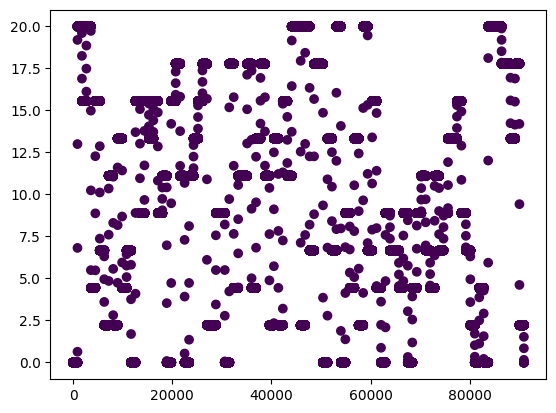

In [ ]:
fig = plt.scatter(x=outliers_df[['Time (s)']], y=outliers_df[['CO (ppm)']], c=outliers_df[['outliers']].values)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names,

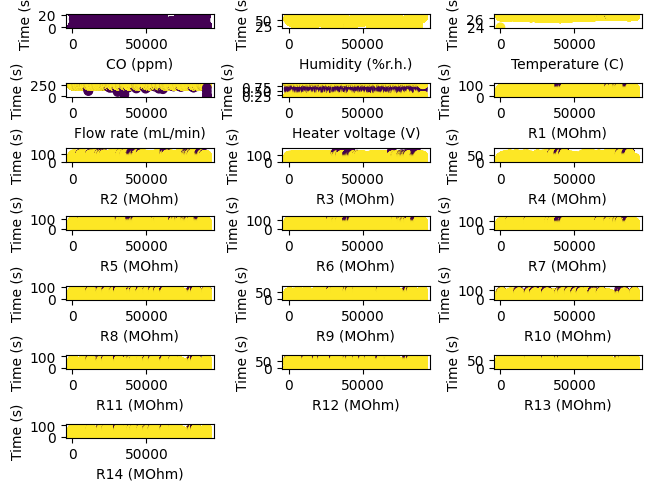

<Figure size 640x480 with 0 Axes>

In [ ]:
clfs = []
outlier_dfs = []
index = 1
for col in col_names[1:]:
  clf = IsolationForest(max_samples=100, random_state=0, contamination=0.004)
  clf.fit(df20160930[[col]])
  outliers = clf.predict(df20160930[[col]])
  outliers_df = df20160930[[col_names[0], col]]
  outliers_df = outliers_df.assign(outliers = outliers)
  outlier_dfs.append(outliers_df)
  clfs.append(clf)




/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


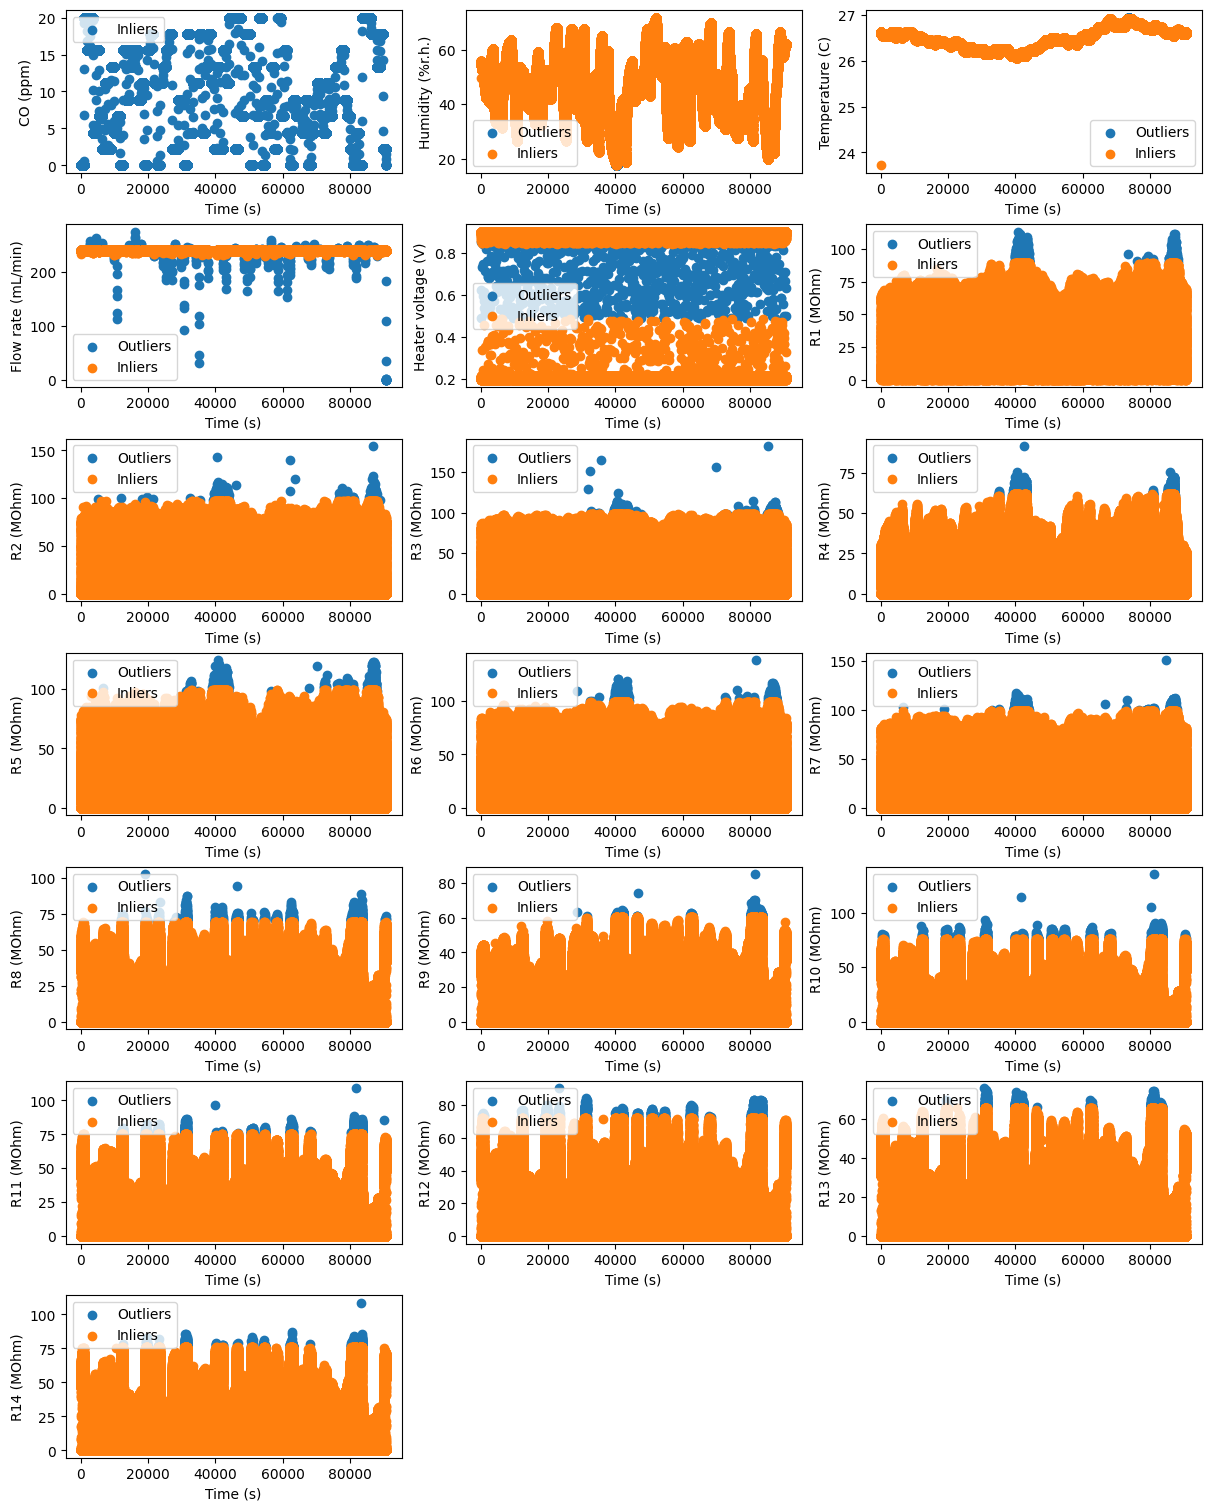

In [ ]:
fig = plt.figure(figsize=(12, 15), layout = "constrained")
labels = {
    -1: "Outliers",
    1: "Inliers"
}
index = 1
for i in range(len(col_names[1:])):
  col = col_names[i + 1]
  outliers_df = outlier_dfs[i]
  outlier_dfs.append(outliers_df)
  ax1 = fig.add_subplot(len(col_names)//3 + 1, 3, index)
  ax1.set_xlabel(col_names[0])
  ax1.set_ylabel(col)
  # Split the dataframe by outliers
  outliers_dict = dict(tuple(outliers_df.groupby(outliers_df['outliers'])))
  for outlier_key in outliers_dict.keys():
    outlier_data = outliers_dict[outlier_key]
    ax1.scatter(outlier_data.iloc[:,0], outlier_data.iloc[:,1], label = labels[outlier_key])
  ax1.legend()
  index += 1
plt.show()

In [ ]:
# Split the dataframe by outliers
outliers_dict = dict(tuple(outliers_df.groupby(outliers_df['outliers'])))

dict_keys([-1, 1])


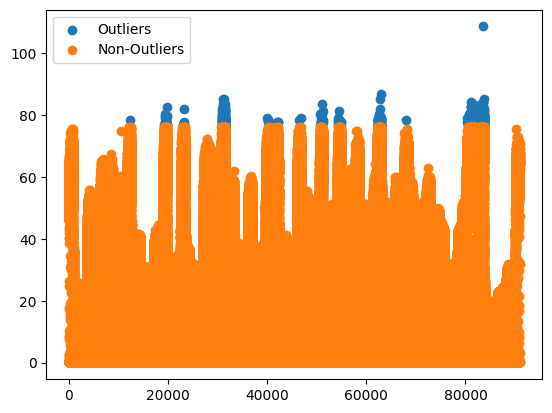

In [ ]:
print(outliers_dict.keys())
labels = {
    -1: "Outliers",
    1: "Non-Outliers"
}
for outlier_key in outliers_dict.keys():
  outlier_data = outliers_dict[outlier_key]
  plt.scatter(outlier_data.iloc[:,0], outlier_data.iloc[:,1], label = labels[outlier_key])
plt.legend()
plt.show()

In [12]:
def get_isolation_forest_data(df, col_names):
  '''Gets the isolation forests for each property in the dataframe'''
  # First column is the x value (ex: time)
  clfs = []
  outlier_dfs = []
  index = 1
  for col in col_names[1:]:
    clf = IsolationForest(max_samples=100, random_state=0, contamination=0.004)
    clf.fit(df[[col]])
    outliers = clf.predict(df[[col]])
    outliers_df = df[[col_names[0], col]]
    outliers_df = outliers_df.assign(outliers = outliers)
    outlier_dfs.append(outliers_df)
    clfs.append(clf)
  return (clfs, outlier_dfs)

In [13]:
def print_isolation_forest_graphs(outlier_dfs, col_names):
  '''Prints the isolation forest graphs'''
  fig = plt.figure(figsize=(12, 15), layout = "constrained")
  labels = {
      -1: "Outliers",
      1: "Inliers"
  }
  index = 1
  for i in range(len(col_names[1:])):
    col = col_names[i + 1]
    outliers_df = outlier_dfs[i]
    outlier_dfs.append(outliers_df)
    ax1 = fig.add_subplot(len(col_names)//3 + 1, 3, index)
    ax1.set_xlabel(col_names[0])
    ax1.set_ylabel(col)
    # Split the dataframe by outliers
    outliers_dict = dict(tuple(outliers_df.groupby(outliers_df['outliers'])))
    for outlier_key in outliers_dict.keys():
      outlier_data = outliers_dict[outlier_key]
      ax1.scatter(outlier_data.iloc[:,0], outlier_data.iloc[:,1], label = labels[outlier_key])
    ax1.legend()
    index += 1
  plt.show()

In [16]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler


In [23]:
# Make a linear SVR model (normal SVR takes too long) with a standard scaler
regr = make_pipeline(StandardScaler(), LinearSVR(C=1.0, epsilon=0.2))
regr.fit(XCO_train, yCO_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.2))])

In [24]:
# Predict the test data
y_predict = regr.predict(XCO_test)

In [15]:
from sklearn.metrics import mean_squared_error


In [27]:
rms = mean_squared_error(yCO_test, y_predict, squared=False)
print(rms)

4.3360239142161054


In [31]:
def get_main_metrics(actual, predict):
  '''Returns a tuple containing RMSE, RMSE / mean, RMSE / range, and MAPE'''
  # Calculate rmse
  diffs = actual - predict
  diffs_squared = diffs ** 2
  mu_diffs_squared = diffs_squared.mean()
  rmse = np.sqrt(mu_diffs_squared)

  # Calculate mean and range
  # mean = np.mean(diffs)
  # range = max(diffs) - min(diffs)
  mean = np.mean(actual)
  range = max(actual) - min(actual)

  # Calculate MAPE
  percentages = diffs / actual
  abs_percentages = abs(percentages)
  mape = np.mean(abs_percentages)
  return (rmse, rmse/mean, rmse/range, mape)

In [29]:
get_main_metrics(yCO_test, y_predict)

<ipython-input-28-b82463fa5612>:14: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


(4.3360239142161054, -43.251437612516284, 0.07292038506245285, inf)

In [17]:
def test_svr(scaler, x_train_data, y_train_data, x_test_data, y_test_data, C = 1.0, epsilon = 0.2, ):
  '''Tests the linear SVR'''
  regr = make_pipeline(scaler, LinearSVR(C=C, epsilon=epsilon))
  regr.fit(x_train_data, y_train_data)
  # Predict the test data
  y_predict = regr.predict(x_test_data)
  # Get the main metrics and return it along with the model
  return (regr, get_main_metrics(y_test_data, y_predict), y_predict)

In [18]:
# Do this for the other types of SVR
robust_co_svr = test_svr(RobustScaler(), XCO_train, yCO_train, XCO_test, yCO_test)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
<ipython-input-14-b82463fa5612>:14: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


In [19]:
robust_co_svr[1]

(5.734254933366486, 3.455450786311886, 0.09808527548884809, inf)

In [20]:
# Do this for the other types of SVR
standard_h_svr = test_svr(StandardScaler(), XH_train, yH_train, XH_test, yH_test)
print(standard_h_svr[1])

(8.641300621456677, -7.395025631222885, 0.1320717558534088, 0.16203942320775805)


In [21]:
robust_h_svr = test_svr(RobustScaler(), XH_train, yH_train, XH_test, yH_test)
print(robust_h_svr[1])

(8.691610843806352, -15.847081996104489, 0.13320678898467592, 0.15960718192276)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [27]:
# Data with removed variables
#define object and featues in the data frame:
X_reduced = df20160930.drop(['Time (s)','Humidity (%r.h.)','CO (ppm)','R2 (MOhm)','R3 (MOhm)','R5 (MOhm)','R6 (MOhm)','R7 (MOhm)','R9 (MOhm)','R10 (MOhm)',
            'R11 (MOhm)', 'R12 (MOhm)', 'R13 (MOhm)', 'R14 (MOhm)'],axis=1).values

In [28]:
#split data into train and test sets:
XCO_reduced_train, XCO_reduced_test, yCO_reduced_train, yCO_reduced_test = train_test_split(X_reduced, yCO, test_size=0.2, random_state=42)
XH_reduced_train, XH_reduced_test, yH_reduced_train, yH_reduced_test = train_test_split(X_reduced, yH, test_size=0.2, random_state=42)

In [33]:
standard_co_svr = test_svr(StandardScaler(), XCO_train, yCO_train, XCO_test, yCO_test)
print(standard_co_svr[1])
robust_co_svr = test_svr(RobustScaler(), XCO_train, yCO_train, XCO_test, yCO_test)
print(robust_co_svr[1])
standard_h_svr = test_svr(StandardScaler(), XH_train, yH_train, XH_test, yH_test)
print(standard_h_svr[1])
robust_h_reduced_svr = test_svr(RobustScaler(), XH_train, yH_train, XH_test, yH_test)
print(robust_h_svr[1])

<ipython-input-31-13ee7e16c12e>:16: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


(4.33652811405826, 0.43873223722036037, 0.216826405702913, inf)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
<ipython-input-31-13ee7e16c12e>:16: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


(4.355878570601408, 0.4406899482894731, 0.21779392853007037, inf)
(8.64099493746546, 0.18786821955478789, 0.1586668185359064, 0.1620385647227809)
(8.691610843806352, -15.847081996104489, 0.13320678898467592, 0.15960718192276)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [32]:
standard_co_reduced_svr = test_svr(StandardScaler(), XCO_reduced_train, yCO_reduced_train, XCO_reduced_test, yCO_reduced_test)
print(standard_co_reduced_svr[1])
robust_co_reduced_svr = test_svr(RobustScaler(), XCO_reduced_train, yCO_reduced_train, XCO_reduced_test, yCO_reduced_test)
print(robust_co_reduced_svr[1])
standard_h_reduced_svr = test_svr(StandardScaler(), XH_reduced_train, yH_reduced_train, XH_reduced_test, yH_reduced_test)
print(standard_h_reduced_svr[1])
robust_h_reduced_svr = test_svr(RobustScaler(), XH_reduced_train, yH_reduced_train, XH_reduced_test, yH_reduced_test)
print(robust_h_reduced_svr[1])

<ipython-input-31-13ee7e16c12e>:16: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


(4.5912134012329044, 0.4644990817767244, 0.2295606700616452, inf)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
<ipython-input-31-13ee7e16c12e>:16: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


(5.247239735734223, 0.5308701265021523, 0.2623619867867112, inf)
(10.202894818287875, 0.22182627089684903, 0.18734658131266757, 0.2027453477827167)
(10.19772972324923, 0.22171397396625667, 0.18725173931783384, 0.20208059230012967)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [34]:
from numpy import copy, concatenate, array

In [25]:
# We need to split the time series into various samples
def multi_sample_split(x_data, y_data_arrays, n_steps):
    # Merge everything into a single stack
    X, y = list(), list()
    x_copy = copy(x_data)
    for y_data in y_data_arrays:
      # print(type(y_data), y_data)
      y_shaped = y_data.reshape(-1, 1)
      # print(x_copy)
      # print(y_shaped)
      x_copy = concatenate((x_copy, y_shaped), axis = 1)
    sequences = x_copy
    print(len(y_data_arrays))
    # print(sequences)
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-len(y_data_arrays)], sequences[end_ix-1, -len(y_data_arrays):]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [35]:
n_steps = 3


XCO_reduced_train_sample, yCO_reduced_train_sample = multi_sample_split(XCO_reduced_train, [yCO_reduced_train], n_steps)
XCO_reduced_test_sample, yCO_reduced_test_sample = multi_sample_split(XCO_reduced_test, [yCO_reduced_test], n_steps)
XH_reduced_train_sample, yH_reduced_train_sample = multi_sample_split(XH_reduced_train, [yH_reduced_train], n_steps)
XH_reduced_test_sample, yH_reduced_test_sample = multi_sample_split(XH_reduced_test, [yH_reduced_test], n_steps)
XHCO_reduced_train_sample, yHCO_reduced_train_sample = multi_sample_split(XH_reduced_train, [yCO_reduced_train, yH_reduced_train], n_steps)
XHCO_reduced_test_sample, yHCO_reduced_test_sample = multi_sample_split(XH_reduced_test, [yCO_reduced_test, yH_reduced_test], n_steps)
n_features = XCO_reduced_train_sample.shape[2]

1
1
1
1
2
2


In [41]:
!pip install scikeras

In [42]:
from scikeras.wrappers import KerasRegressor

In [67]:
def basic_fnn(n_steps, n_features, n_outputs):
  model = Sequential()
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.50))
  model.add(Dense(n_outputs))
  model.compile(optimizer='adam', loss='mse', metrics = ["accuracy"])
  return model

In [100]:
def test_basic_fnn(scaler, x_train_data, y_train_data, x_test_data, y_test_data, n_steps, n_features, n_outputs):
  '''Tests the basic fnn'''
  # Transform each of the feature data
  x_train_data_c = copy(x_train_data)
  x_test_data_c = copy(x_test_data)
  for i in range(n_steps):
    x_train_data_c[:,i,:] = scaler.fit_transform(x_train_data_c[:,i,:], y_train_data)
    x_test_data_c[:,i,:] = scaler.fit_transform(x_test_data_c[:,i,:], y_test_data)
  regr = basic_fnn(n_steps, n_features, n_outputs)
  regr.fit(x_train_data, y_train_data, epochs=12,
                    validation_data=(x_test_data, y_test_data))
  # Predict the test data
  y_predict = regr.predict(x_test_data)
  # Get the main metrics and return it along with the model
  y_predict_shaped = y_predict[:,1,:].reshape(1, -1)[0]
  y_test_data_shaped = y_test_data.reshape(1, -1)[0]
  return (regr, get_main_metrics(y_test_data_shaped, y_predict_shaped), y_predict_shaped)

In [79]:
print(yCO_reduced_train_sample.reshape(1, -1)[0].shape)

(236573,)


In [80]:
yCO_reduced_train.shape

(236575,)

In [101]:
standard_co_reduced_fnn = test_basic_fnn(StandardScaler(), XCO_reduced_train_sample, yCO_reduced_train_sample, XCO_reduced_test_sample, yCO_reduced_test_sample, n_steps, n_features, 1)
print(standard_co_reduced_fnn[1])
robust_co_reduced_fnn = test_basic_fnn(RobustScaler(), XCO_reduced_train_sample, yCO_reduced_train_sample, XCO_reduced_test_sample, yCO_reduced_test_sample, n_steps, n_features, 1)
print(robust_co_reduced_fnn[1])
standard_h_reduced_fnn = test_basic_fnn(StandardScaler(), XH_reduced_train_sample, yH_reduced_train_sample, XH_reduced_test_sample, yH_reduced_test_sample, n_steps, n_features, 1)
print(standard_h_reduced_fnn[1])
robust_h_reduced_fnn = test_basic_fnn(RobustScaler(), XH_reduced_train_sample, yH_reduced_train_sample, XH_reduced_test_sample, yH_reduced_test_sample, n_steps, n_features, 1)
print(robust_h_reduced_fnn[1])

Epoch 1/12
7393/7393 [==============================] - 24s 3ms/step - loss: 49.7655 - accuracy: 3.2266e-04 - val_loss: 39.1347 - val_accuracy: 0.0000e+00
Epoch 2/12
7393/7393 [==============================] - 24s 3ms/step - loss: 41.6641 - accuracy: 0.0000e+00 - val_loss: 38.8766 - val_accuracy: 0.0000e+00
Epoch 3/12
7393/7393 [==============================] - 25s 3ms/step - loss: 39.8130 - accuracy: 0.0000e+00 - val_loss: 38.8625 - val_accuracy: 0.0000e+00
Epoch 4/12
7393/7393 [==============================] - 20s 3ms/step - loss: 39.4547 - accuracy: 0.0000e+00 - val_loss: 38.9832 - val_accuracy: 0.0000e+00
Epoch 5/12
7393/7393 [==============================] - 23s 3ms/step - loss: 39.3635 - accuracy: 0.0000e+00 - val_loss: 38.8947 - val_accuracy: 0.0000e+00
Epoch 6/12
7393/7393 [==============================] - 20s 3ms/step - loss: 39.3019 - accuracy: 0.0000e+00 - val_loss: 38.8543 - val_accuracy: 0.0000e+00
Epoch 7/12
7393/7393 [==============================] - 21s 3ms/step -

<ipython-input-31-13ee7e16c12e>:16: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


(6.603760808415452, 0.668096172732403, 0.3301880404207726, inf)
Epoch 1/12
7393/7393 [==============================] - 21s 3ms/step - loss: 65.2489 - accuracy: 0.0011 - val_loss: 39.9899 - val_accuracy: 0.0000e+00
Epoch 2/12
7393/7393 [==============================] - 20s 3ms/step - loss: 42.4703 - accuracy: 0.0000e+00 - val_loss: 38.9739 - val_accuracy: 0.0000e+00
Epoch 3/12
7393/7393 [==============================] - 21s 3ms/step - loss: 39.9626 - accuracy: 0.0000e+00 - val_loss: 39.1461 - val_accuracy: 0.0000e+00
Epoch 4/12
7393/7393 [==============================] - 20s 3ms/step - loss: 39.5945 - accuracy: 4.2270e-06 - val_loss: 39.0800 - val_accuracy: 0.0000e+00
Epoch 5/12
7393/7393 [==============================] - 23s 3ms/step - loss: 39.5753 - accuracy: 0.0000e+00 - val_loss: 39.3659 - val_accuracy: 0.0000e+00
Epoch 6/12
7393/7393 [==============================] - 22s 3ms/step - loss: 39.5654 - accuracy: 1.4090e-06 - val_loss: 39.1045 - val_accuracy: 0.0000e+00
Epoch 7/12

<ipython-input-31-13ee7e16c12e>:16: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


(6.581727445179093, 0.6658670784211923, 0.32908637225895465, inf)
Epoch 1/12
7393/7393 [==============================] - 23s 3ms/step - loss: 290.7924 - accuracy: 0.0000e+00 - val_loss: 156.9713 - val_accuracy: 0.0000e+00
Epoch 2/12
7393/7393 [==============================] - 20s 3ms/step - loss: 242.4477 - accuracy: 0.0000e+00 - val_loss: 147.2030 - val_accuracy: 0.0000e+00
Epoch 3/12
7393/7393 [==============================] - 22s 3ms/step - loss: 214.5533 - accuracy: 0.0000e+00 - val_loss: 144.2772 - val_accuracy: 0.0000e+00
Epoch 4/12
7393/7393 [==============================] - 22s 3ms/step - loss: 196.4385 - accuracy: 0.0000e+00 - val_loss: 144.0406 - val_accuracy: 0.0000e+00
Epoch 5/12
7393/7393 [==============================] - 21s 3ms/step - loss: 182.3852 - accuracy: 0.0000e+00 - val_loss: 144.4236 - val_accuracy: 0.0000e+00
Epoch 6/12
7393/7393 [==============================] - 20s 3ms/step - loss: 171.3593 - accuracy: 0.0000e+00 - val_loss: 147.1682 - val_accuracy: 0.0

In [102]:
n_steps = 3


XCO_train_sample, yCO_train_sample = multi_sample_split(XCO_train, [yCO_train], n_steps)
XCO_test_sample, yCO_test_sample = multi_sample_split(XCO_test, [yCO_test], n_steps)
XH_train_sample, yH_train_sample = multi_sample_split(XH_train, [yH_train], n_steps)
XH_test_sample, yH_test_sample = multi_sample_split(XH_test, [yH_test], n_steps)
n_features = XCO_train_sample.shape[2]

1
1
1
1


In [104]:
standard_co_fnn = test_basic_fnn(StandardScaler(), XCO_train_sample, yCO_train_sample, XCO_test_sample, yCO_test_sample, n_steps, n_features, 1)
print(standard_co_fnn[1])
robust_co_fnn = test_basic_fnn(RobustScaler(), XCO_train_sample, yCO_train_sample, XCO_test_sample, yCO_test_sample, n_steps, n_features, 1)
print(robust_co_fnn[1])
standard_h_fnn = test_basic_fnn(StandardScaler(), XH_train_sample, yH_train_sample, XH_test_sample, yH_test_sample, n_steps, n_features, 1)
print(standard_h_fnn[1])
robust_h_fnn = test_basic_fnn(RobustScaler(), XH_train_sample, yH_train_sample, XH_test_sample, yH_test_sample, n_steps, n_features, 1)
print(robust_h_fnn[1])

Epoch 1/12
7393/7393 [==============================] - 21s 3ms/step - loss: 266159.9688 - accuracy: 0.0089 - val_loss: 44.3877 - val_accuracy: 0.0000e+00
Epoch 2/12
7393/7393 [==============================] - 23s 3ms/step - loss: 59.0009 - accuracy: 0.0018 - val_loss: 42.9944 - val_accuracy: 0.0000e+00
Epoch 3/12
7393/7393 [==============================] - 20s 3ms/step - loss: 48.3639 - accuracy: 2.2544e-05 - val_loss: 42.0801 - val_accuracy: 0.0000e+00
Epoch 4/12
7393/7393 [==============================] - 23s 3ms/step - loss: 41.3504 - accuracy: 0.0000e+00 - val_loss: 41.1377 - val_accuracy: 0.0000e+00
Epoch 5/12
7393/7393 [==============================] - 20s 3ms/step - loss: 41.2462 - accuracy: 2.8180e-06 - val_loss: 41.2110 - val_accuracy: 0.0000e+00
Epoch 6/12
7393/7393 [==============================] - 24s 3ms/step - loss: 41.2298 - accuracy: 0.0000e+00 - val_loss: 41.1726 - val_accuracy: 0.0000e+00
Epoch 7/12
7393/7393 [==============================] - 20s 3ms/step - los

<ipython-input-31-13ee7e16c12e>:16: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


(6.43270960487697, 0.6507910858674, 0.32163548024384847, inf)
Epoch 1/12
7393/7393 [==============================] - 23s 3ms/step - loss: 298256.3438 - accuracy: 0.0205 - val_loss: 63.1323 - val_accuracy: 4.5089e-05
Epoch 2/12
7393/7393 [==============================] - 22s 3ms/step - loss: 77.6826 - accuracy: 0.0026 - val_loss: 56.3503 - val_accuracy: 0.0000e+00
Epoch 3/12
7393/7393 [==============================] - 21s 3ms/step - loss: 45.6817 - accuracy: 1.2681e-05 - val_loss: 41.2933 - val_accuracy: 0.0000e+00
Epoch 4/12
7393/7393 [==============================] - 26s 4ms/step - loss: 41.3100 - accuracy: 2.8180e-06 - val_loss: 41.2592 - val_accuracy: 0.0000e+00
Epoch 5/12
7393/7393 [==============================] - 21s 3ms/step - loss: 41.3047 - accuracy: 4.2270e-06 - val_loss: 41.2592 - val_accuracy: 0.0000e+00
Epoch 6/12
7393/7393 [==============================] - 24s 3ms/step - loss: 48.9203 - accuracy: 0.0000e+00 - val_loss: 41.2554 - val_accuracy: 0.0000e+00
Epoch 7/12
7

<ipython-input-31-13ee7e16c12e>:16: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


(6.429654677938719, 0.6504820218272819, 0.32148273389693593, inf)
Epoch 1/12
7393/7393 [==============================] - 22s 3ms/step - loss: 39334.3438 - accuracy: 0.0000e+00 - val_loss: 219.4147 - val_accuracy: 0.0000e+00
Epoch 2/12
7393/7393 [==============================] - 24s 3ms/step - loss: 407.1425 - accuracy: 0.0000e+00 - val_loss: 184.7591 - val_accuracy: 0.0000e+00
Epoch 3/12
7393/7393 [==============================] - 21s 3ms/step - loss: 324.3376 - accuracy: 0.0000e+00 - val_loss: 257.5234 - val_accuracy: 0.0000e+00
Epoch 4/12
7393/7393 [==============================] - 24s 3ms/step - loss: 283.8300 - accuracy: 0.0000e+00 - val_loss: 194.6749 - val_accuracy: 0.0000e+00
Epoch 5/12
7393/7393 [==============================] - 21s 3ms/step - loss: 225.2919 - accuracy: 0.0000e+00 - val_loss: 154.5396 - val_accuracy: 0.0000e+00
Epoch 6/12
7393/7393 [==============================] - 22s 3ms/step - loss: 199.2460 - accuracy: 0.0000e+00 - val_loss: 197.7301 - val_accuracy: 0

In [94]:
standard_co_reduced_fnn[1].shape

(59142, 3, 1)

In [90]:
yCO_reduced_test_sample.shape

(59142, 1)

In [91]:
XCO_reduced_test_sample.shape

(59142, 3, 6)

In [92]:
predictions = standard_co_reduced_fnn[0].predict(XCO_reduced_test_sample)

1849/1849 [==============================] - 5s 3ms/step


In [99]:
predictions_shaped = predictions[:,1,:].reshape(1, -1)[0]
print(predictions_shaped)

[ 9.459612 11.395508  8.116233 ...  7.818333 11.764977 12.019827]
